# Introduction to EDA

EDA is the process of procuring, understanding and deriving meaningful statistcal
insights from structured/unstructure data of interest.


EDA guides later decisions of which features/signals to use or avoid and which predictice
models to use or avoid, and invalidates incorrect hypotheses while validating and introduction
correct hypothesis about the nature of variables and the relationsips between them.

# Steps in EDA
1. Loading the necessary libraries and setting them up
2. Data collection
3. Data wrangling/mangling
4. Data cleaning
5. Obtaining descriptive statistics
6. Visual inspection of the data
7. Data cleaning
8. Advanced visualization techniques



# Loading the necessary libraries and setting them up

In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
import mpld3

mpld3.enable_notebook()

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',2)

# Data Collection



In [22]:
A = pd.read_csv('A.csv',parse_dates=True,index_col = 0)
A



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000
...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000


In [23]:
# Loading dataFrame B

B = pd.read_csv('B.csv',parse_dates=True,index_col=0)
B

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3092080000
...,...,...,...,...,...,...
2020-05-14,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5641920000


In [24]:
# Loading dataFrame C

C = pd.read_csv('C.csv',parse_dates=True,index_col=0)
C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,12.46,13.090000,12.350000,12.380000,12.380000,0
...,...,...,...,...,...,...
2020-05-14,35.16,39.279999,32.330002,32.610001,32.610001,0


# Data wrangling/munging

Data reely comes in a ready to use format. it refers to the process of manipulating and transforming
data from its initial raw source into structured, formatted and easily use datasets

In [25]:
# using pandas.dataframe.join(...) to merge the dataframes and align them to hava the same datetimeindex format

merged_df = A.join(B,how='outer',lsuffix ='_A',sort=True).join(C,how='outer',lsuffix='_B',rsuffix='_C',sort=True)

merged_df

# outer join uses the union across all three dataframes. When it cannot find values for a specific datatframe for a specific data
# it places a Nan value for that DataFrames field


,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


# Data cleaning

It refers to the process from coming from missing data, incorrect data values and outliers

In [26]:
# checking to see if there are any rows where all values are missing(NaN), as follows:

merged_df[merged_df.isnull().all(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,


In [27]:
merged_df[['Close_A','Close_B','Close_C']].isnull().any(axis=1).sum()

148

In [28]:
# For our further analysis, we  need to have valid Close prices.Thus, we can drop all
# rows where the Close price for any of the three instruments is missing , by running the follwoing code

valid_close_df = merged_df.dropna(subset=['Close_A','Close_B','Close_C'],how='any')

valid_close_df[['Close_A','Close_B','Close_C']].isnull().any(axis=1).sum()

0

In [29]:
valid_close_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


In [30]:
# Lest deal with rows that have Nan values for any of the other fields ,starting with
# getting a sense how many such rows  exist. We can do this by


valid_close_df.isnull().any(axis=1).sum()

165

In [31]:
# inspecting a few rows with some missiong values are displayed (displaying only the first seven columns) as shown here:

valid_close_df[valid_close_df.isnull().any(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.22,NaN,12.730000,12.730000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,24120.779297,24120.779297,23645.300781,23723.689453,23723.689453,418160000.0,NaN,2869.090088,2821.610107,2830.709961,2830.709961,4.753160e+09,38.169998,39.57,36.59,37.189999,37.189999,0.0


In [32]:
# using fillna method wiht a method called backfill - this uses the next valid value after the 
# missiong value to fill in the mission value.

valid_close_complete = valid_close_df.fillna(method='backfill')

valid_close_complete.isnull().any(axis=1).sum()

0

# Obtaining descriptive statistics

 The next step is to generate the key basic statistics on data to build familiarity with each field ,with 
  the DataFrame.describe(...
  )

In [33]:
pd.set_option('display.max_rows',None)
valid_close_complete.describe()

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0
mean,22291.125036,22402.395046,22168.922744,22292.881128,22292.531416,2.614436e+08,2517.857235,2529.804546,2504.360406,2518.053995,2518.053995,3.746609e+09,14.628353,17.614230,16.655851,16.417606,16.417606,0.0
std,3771.056417,3784.558787,3755.740756,3769.395516,3767.906829,1.537677e+08,374.081451,375.376401,373.086693,374.314671,374.314671,9.013618e+08,29.023906,9.056045,20.123487,8.016538,8.016538,0.0
min,15676.259766,15897.820313,15370.330078,15660.179688,15660.179688,4.589000e+07,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09,-400.000000,9.310000,8.560000,9.140000,9.140000,0.0
25%,18232.280274,18285.384766,18156.614258,18230.160156,18227.615235,1.233350e+08,2144.320069,2152.525024,2134.464966,2142.250000,2142.250000,3.247990e+09,12.405000,12.900000,11.875000,12.300000,12.300000,0.0
50%,22762.029297,22872.890625,22634.449219,22773.669922,22773.669922,2.631800e+08,2521.199951,2551.820068,2503.189941,2531.939941,2531.939941,3.560770e+09,14.190000,15.010000,13.470000,14.090000,14.090000,0.0
75%,25516.320312,25659.810547,25382.705078,25518.895508,25518.895508,3.328450e+08,2815.010010,2831.880004,2800.239991,2817.330078,2817.330078,3.967360e+09,17.685001,19.040001,16.809999,17.665000,17.665000,0.0
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,82.690002,85.470001,330.000000,82.690002,82.690002,0.0


 Key Observations from the description table

 * Volume_C has all statistics to be 0, implying every row has the Volume_C value set to 0. Therefore, we need 
  to remove this column

  * Open_C has a minimum value of -400 , which is unlikely to be true for the following reasons
     * The other price fields - High_C , Low_C and CLOSE_C and adj close_C all have minimum values around 9,
        so it doenst make sense for Open_C to have a minium of value of -400

    *  Given that the 25th percentile for Open_C is 12.4, it is unlikely that the minimum value woluld be so
      much lower than that

    * The price of an aaset should be non negative

* Low_C has maximum value of 330, which is again unlikely because of the following reasons:
    * For the same resons given previously
    * IN addition, considering that Low_C should be always be lower the highest price

In [34]:
pd.set_option('display.max_rows',2)


# lets remove the volume fields of all threee instruments

prices_only = valid_close_complete.drop(['Volume_A','Volume_B','Volume_C'],axis=1)

prices_only

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Open_C,High_C,Low_C,Close_C,Adj Close_C
Date,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,12.46,13.090000,12.350000,12.380000,12.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,35.16,39.279999,32.330002,32.610001,32.610001


# Visual Inspection of the data



<AxesSubplot: xlabel='Date'>

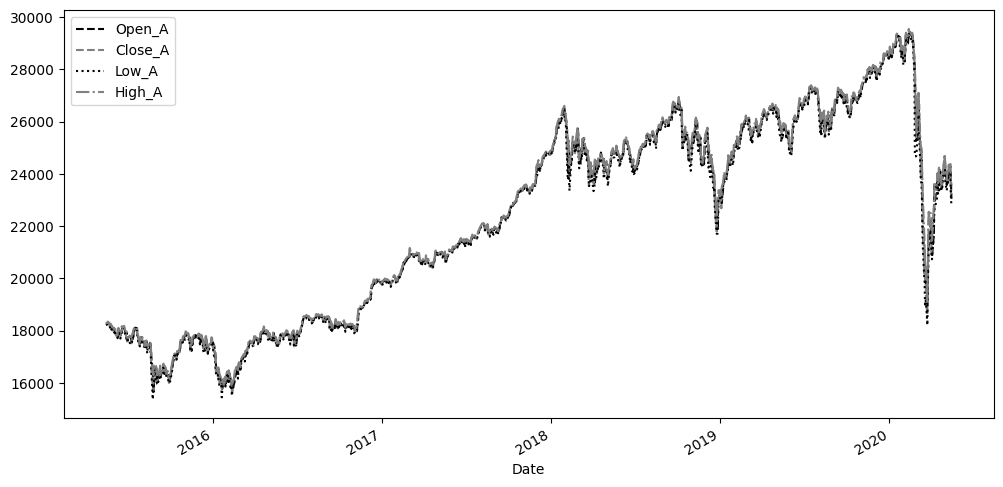

In [36]:
valid_close_complete['Open_A'].plot(figsize=(12,6),linestyle='--',color='black',legend='Open_A')
valid_close_complete['Close_A'].plot(figsize=(12,6),linestyle='--',color='grey',legend='Close_A')
valid_close_complete['Low_A'].plot(figsize=(12,6),linestyle=':',color='black',legend='Low_A')
valid_close_complete['High_A'].plot(figsize=(12,6),linestyle='-.',color='grey',legend='High_A')


<AxesSubplot: xlabel='Date'>

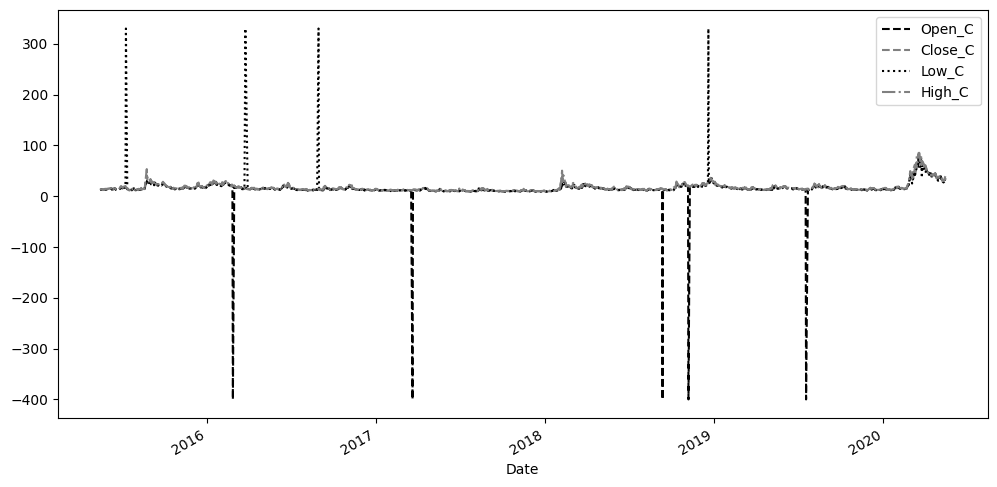

In [37]:
# Now, lets plot the prices of C to see if the plot provides further evidence regarding our suspicions about 
# some prices being incorrect.

valid_close_complete['Open_C'].plot(figsize=(12,6),linestyle='--',color='black',legend='Open_C')
valid_close_complete['Close_C'].plot(figsize=(12,6),linestyle='--',color='grey',legend='Close_C')
valid_close_complete['Low_C'].plot(figsize=(12,6),linestyle=':',color='black',legend='Low_C')
valid_close_complete['High_C'].plot(figsize=(12,6),linestyle='-.',color='grey',legend='High_C')



In [38]:
# The output confirms that open_C and Low_c have some erroneous values extremely far away from other values-- these 
# are outliers


# We will need to perform some further data cleaning to eliminate these outliers values so that
# we do not derive incorrect statistical insights from our data

# The two most commmonly used methods to detect and remove outliers are the interquartile range(IQR) and the Z-score



# IQR

The IQR method uses a percentile/quantile range of values over the entire dataset to identify and remove outliers

WHen applying the IQR method , we usually use extreme percentile values,such as 5% to 95% to minimize the risk of removing 
the correct data points.


In our example of open_C , let's use the 25th percentile and the 75th percentile and remove all data points twith values
outside that range.


# Z-score

The Z-score(or standard score) is obtained by substracting the mean of the dataset from each data point and normalizing
the result by dividing by the standard deviation of the dataset

In other words, the z-score of a data point represents the distance in the number of standard deviation of the data point is away from the mean of all data points.

For a normal distribution(applicable for large enough datasets) there is a distribution rule of 68-95-99, summarized as follows:
* 65% of all data lie in  a range of one standard deviation from the mean.
* 95% of all data lie in a range of two standard deviation from the mean.
* 99% of all data will lie within a range of three standard deviations from the mean.